<a href="https://colab.research.google.com/github/GUC-DM/w24-mini-project-1-maryam-elgharraz-t7-sara-elesaily-t7/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Maryam Elgharraz

ID: 55-21792

Tutorial: T7

---

Name: Sara Elesaily

ID: 55-26365

Tutorial: T7

---
Name: Mariam Soliman

ID: 55-10352

Tutorial: T7



## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.isnull().sum()





,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


In [ ]:
print(df.dtypes)


year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
sellingprice     object
saledate         object
dtype: object


In [ ]:
print(df.shape)


(46578, 15)


In [ ]:
df.describe()


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
df.describe(include='all')


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Count of unique values in a column
unique_count = df['vin'].nunique()

print(f"Number of unique values: {unique_count}")


Number of unique values: 46578


In [ ]:
# From the ouput , we notice that there is a "-" category that indicates no color specified and it repeated in 2246 rows
df['color'].value_counts()


,count
color,
black,9156
white,8693
gray,7046
silver,6982
blue,4244
red,3685
—,2246
gold,948
green,891


In [ ]:
# From the ouput , we notice that there is a "-" category that indicates no color specified and it repeated in 988 rows

df['interior'].value_counts()


,count
interior,
black,20734
gray,15020
beige,4917
tan,3777
—,988
brown,694
blue,101
red,92
silver,88


In [ ]:
df['transmission'].unique()


array(['automatic', 'manual'], dtype=object)

In [ ]:
df['state'].unique()


array(['ma', 'fl', 'wa', 'co', 'ca', 'il', 'nv', 'mo', 'tx', 'ne', 'md',
       'nj', 'la', 'ny', 'nc', 'ut', 'va', 'ga', 'tn', 'oh', 'ms', 'pa',
       'or', 'mi', 'wi', 'az', 'pr', 'mn', 'in', 'hi', 'sc', 'ok', 'nm',
       'al'], dtype=object)

In [ ]:
df['seller'].value_counts()


,count
seller,
"ford motor credit company,llc",1733
the hertz corporation,1561
nissan-infiniti lt,1514
santander consumer,1425
avis corporation,1158
...,...
hg motor company llc,1
orlando mini,1
braddock motors llc,1


In [ ]:
unique_counts = df['trim'].value_counts()
unique_counts

,count
trim,
Base,4851
SE,3940
LX,1912
Limited,1506
LT,1501
...,...
Formula,1
318i,1
Turbo PZEV,1


In [ ]:
df['condition'].unique()


array([3.9, 4.9, 4.1, 1.9, 4.6, 3.6, 1.7, 5. , 4.4, 2.7, 1. , 4.2, 2.5,
       3.5, 4. , 3. , 3.1, 2.4, 4.7, 4.5, 3.3, 2.9, 3.4, 2.8, 2.1, 4.3,
       2.3, 3.7, 3.2, 2. , 2.2, 2.6, 3.8, 4.8, 1.4, 1.6, 1.1, 1.8, 1.3,
       1.5, 1.2])

In [ ]:
df['make'].unique()


array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

In [ ]:
df['body'].unique()


array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#The interior column had some unspeciifed colors represented as a dash "-" in the data
#We replaced the "-" with the mode which is the most repeated color/ the color with the highest frequency which is black

interior_mode = df['interior'].mode()[0]
df['interior'] = df['interior'].replace('—', interior_mode)

print('Mode is : ' + interior_mode)
print (df.head())
print(df['interior'].value_counts())

#We will find that the "-" does not exist anymore either in the head or in the unique values







Mode is : black
   year     make         model   trim          body transmission  \
0  2013  Hyundai        Sonata    GLS         sedan    automatic   
1  2014   Toyota       4Runner    SR5           SUV    automatic   
2  2012    Lexus        IS 250   Base         Sedan    automatic   
3  2002      BMW            X5   4.4i           SUV    automatic   
4  2014     Ford  E-Series Van  E-250  E-Series Van    automatic   

                 vin state  condition    odometer   color interior  \
0  5npeb4acxdh702805    ma        3.9   50404.0mi   black     gray   
1  jtezu5jr2e5064567    fl        4.9   17846.0mi    gray    black   
2  jthbf5c24c5168599    fl        4.1   21122.0mi  silver    black   
3  5uxfb33562lh33864    fl        1.9  145303.0mi   black    black   
4  1ftne2ew0eda31832    wa        4.9    6714.0mi   white     gray   

                             seller sellingprice  \
0             the hertz corporation       $10900   
1  award auto sales and leasing inc       $29900  

In [ ]:
#The color column had some unspeciifed colors represented as a dash "-" in the data
#We replaced the "-" with the mode which is the most repeated color/ the color with the highest frequency which is black

color_mode = df['color'].mode()[0]
df['color'] = df['color'].replace('—', color_mode)
df['color'].value_counts()


#Output
print('Mode is : ' + color_mode)
print (df.head())
print(df['color'].value_counts())

#We will find that the "-" does not exist anymore in the unique values






Mode is : black
   year     make         model   trim          body transmission  \
0  2013  Hyundai        Sonata    GLS         sedan    automatic   
1  2014   Toyota       4Runner    SR5           SUV    automatic   
2  2012    Lexus        IS 250   Base         Sedan    automatic   
3  2002      BMW            X5   4.4i           SUV    automatic   
4  2014     Ford  E-Series Van  E-250  E-Series Van    automatic   

                 vin state  condition    odometer   color interior  \
0  5npeb4acxdh702805    ma        3.9   50404.0mi   black     gray   
1  jtezu5jr2e5064567    fl        4.9   17846.0mi    gray    black   
2  jthbf5c24c5168599    fl        4.1   21122.0mi  silver    black   
3  5uxfb33562lh33864    fl        1.9  145303.0mi   black    black   
4  1ftne2ew0eda31832    wa        4.9    6714.0mi   white     gray   

                             seller sellingprice  \
0             the hertz corporation       $10900   
1  award auto sales and leasing inc       $29900  

In [ ]:
#Removing the "mi" from odometer since we already know all values are in miles

df['odometer'] = df['odometer'].str.replace('mi', '', regex=False)
df.head()

#Output can be shown in head as we can see that "mi" has been removed



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
#odometer datatype was object so we had to convert it to either int or float so that we can deal with it later in the data
print(df['odometer'].dtype)

#we converted it to float
df['odometer'] = df['odometer'].astype(float)
print(df['odometer'].dtype)


object
float64


In [ ]:
#Selling price is supposed to be either int or float, it was an object
#We had to remove the "$" sign first and keep only the numbers since we know it is already in dollars and we need to do opeartion on it later so object won't be the right type
#We converted it to int


#Here we removed the "$" sign
print(df['sellingprice'].dtype) #before

df['sellingprice'] = df['sellingprice'].str.extract('([0-9,.]+)', expand=False)

df.head() #we can see how it looks like in the data frame (output)




object


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
#Here is the conversion from object to int

#df['sellingprice'] = df['sellingprice'].astype(float)

df['sellingprice'] = df['sellingprice'].astype(int)

print(df['sellingprice'].dtype) #After
df.head() #we can see how it looks like in the data frame too (output)


int64


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
# pattern = r'(sedan|coupe|convertible|hatchback|suv|minivan|wagon|cab|van)'

# # Extract main body types, converting to lowercase
# df['body'] = df['body'].str.extract(pattern, expand=False).str.lower()

# # Replace 'cab' related entries with 'Pickup Truck'
# df.loc[df['body'].str.contains('cab', na=False), 'body'] = 'Pickup Truck'

# # Replace any 'van' entries with 'Minivan'
# df.loc[df['body'].str.contains('van', na=False), 'body'] = 'Minivan'

# # Final cleanup to ensure proper categorization
# # Ensure that any NaN values that arise from extraction are filled
# df['body'] = df['body'].fillna('Unknown')  # Placeholder for anything unclassified

# # Display unique values after categorization
# unique_values = df['body'].unique()

# # Print final unique values and DataFrame head
# print(unique_values)
# print(df.head())

In [ ]:
def categorize_body_type(body_type):
    body_type = body_type.lower()

    if 'cab' in body_type or 'crew' in body_type:
        return 'Pickup Truck'
    elif 'van' in body_type:
        return 'Minivan'
    elif 'sedan' in body_type:
        return 'Sedan'
    elif 'suv' in body_type:
        return 'SUV'
    elif 'wagon' in body_type:
        return 'Wagon'
    elif 'coupe' in body_type or 'koup' in body_type:
        return 'Coupe'
    elif 'convertible' in body_type:
        return 'Convertible'
    elif 'hatchback' in body_type:
        return 'Hatchback'
    else:
        return body_type  # Keep the original value if it doesn't match any category

df['body'] = df['body'].apply(categorize_body_type)

unique_values = df['body'].unique()

print(unique_values)
df.head(10)


['Sedan' 'SUV' 'Minivan' 'Pickup Truck' 'Wagon' 'Coupe' 'Convertible'
 'Hatchback']


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,Sedan,automatic,5xxgm4a70eg329048,co,4.6,8386.0,black,gray,"kia motors america, inc",15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Pickup Truck,automatic,3gnfk12387g117727,wa,3.6,100676.0,gray,black,lexus of tacoma at fife,13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,ca,4.6,87860.0,white,beige,aaero sweet company,14700,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,il,1.7,27819.0,gray,black,wells fargo dealer services,20000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,nv,4.9,4046.0,blue,gray,"kia motors america, inc",13600,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


In [ ]:
#Checking that we only have the 8 main categories required in the output

unique_counts = df['body'].value_counts()
unique_counts

,count
body,
Sedan,21574
SUV,11936
Pickup Truck,3977
Minivan,2632
Hatchback,2270
Coupe,1787
Wagon,1438
Convertible,964


In [ ]:
print(df['saledate'].dtype) #Before
#Coverted the saledate to datetime instead of object
df['saledate'] = pd.to_datetime(df['saledate'].str.replace(r' GMT.*', '', regex=True), format='%a %b %d %Y %H:%M:%S')
print(df['saledate'].dtype) #After
df.head()


object
datetime64[ns]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,2015-06-02 02:30:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900,2015-02-18 07:15:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,2015-01-20 01:30:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,2015-03-04 07:10:00
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,2015-02-18 06:45:00





## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

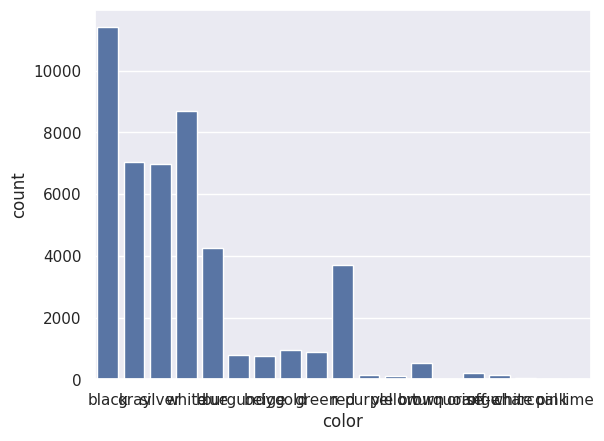

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

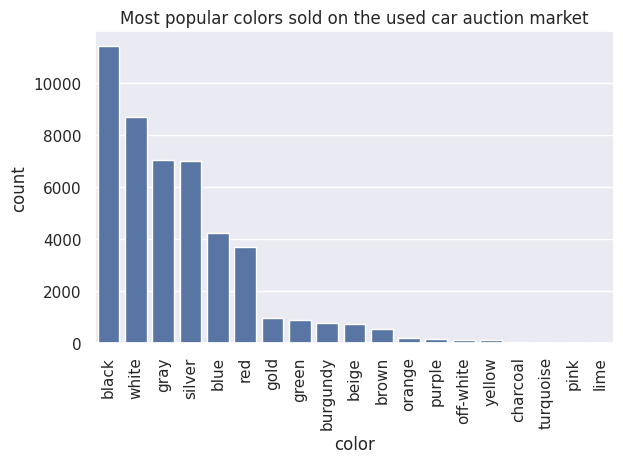

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

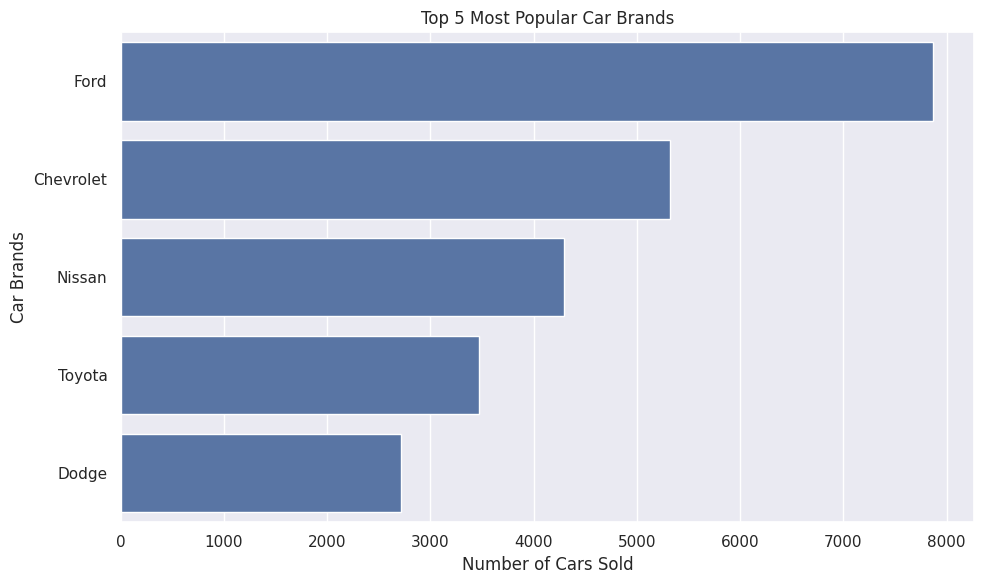

In [ ]:
# Here we first stored the number sold by each brand in a variable
brand_counts = df['make'].value_counts()

#print(df['make'].nunique())
#Since there are 48 car brands in our data so fitting them to the graph will be hard and since the questions says minumum three so :
#Here we decided we will diplay the top 5 so we stored this in a variable and got the top 5 brands '
n = 5
top_brands = brand_counts.head(n).index

# Here we started plotting the top 5 brands and we used a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=df[df['make'].isin(top_brands)], order=top_brands).set(title='Top 5 Most Popular Car Brands')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Car Brands')
plt.tight_layout()
plt.show()



**Answer for Q1**: Your answer here
The most popular car brands are Ford, Chevrolet, Nissan, Toyota and Dodge
By order: Toyota is the most popular as it has the highest sales, then comes Chevrolet then Nissan then Toyota and lastly Dodge.



**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**





**Visualization**

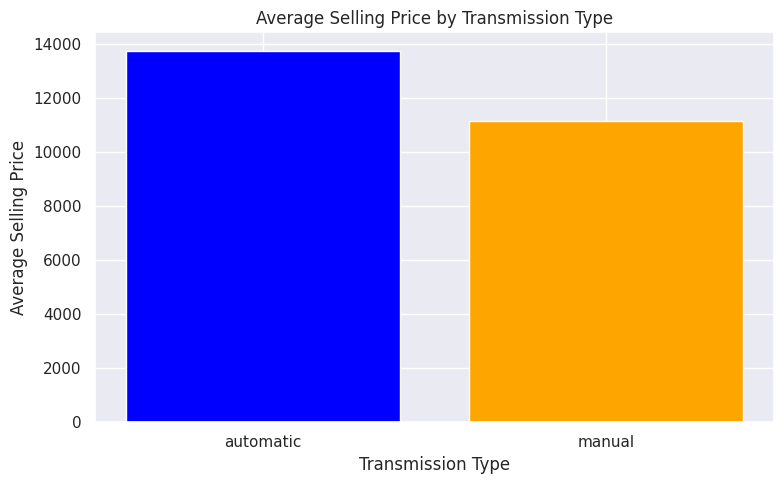

In [ ]:
#automatic_count = (df['transmission'] == 'automatic').sum()
#df['transmission'].value_counts()

#The transmission column has only two values which are automatics and manual so we calculated the average price of each and where stored in a seperate df that groups each
#So each group will have its on average price.
#This was done using this line of code:
average_prices = df.groupby('transmission')['sellingprice'].mean().reset_index()


# For the plotting: we presented the average prices in a bar chart so that we can easily compare between both of them
plt.figure(figsize=(8, 5))
plt.bar(average_prices['transmission'], average_prices['sellingprice'], color=['blue', 'orange'])
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')
plt.tight_layout()
plt.show()


**Answer for Q2**: Your answer here

From the bar graph shown above , we can observe that theh automtic transimission type is of higher average selling price than that of the manual.
As the average selling price of the automatic is about 13000 almost near 14000
dollars while the manual's average selling price is about $11,000.
So the answer is : yes ,it does.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

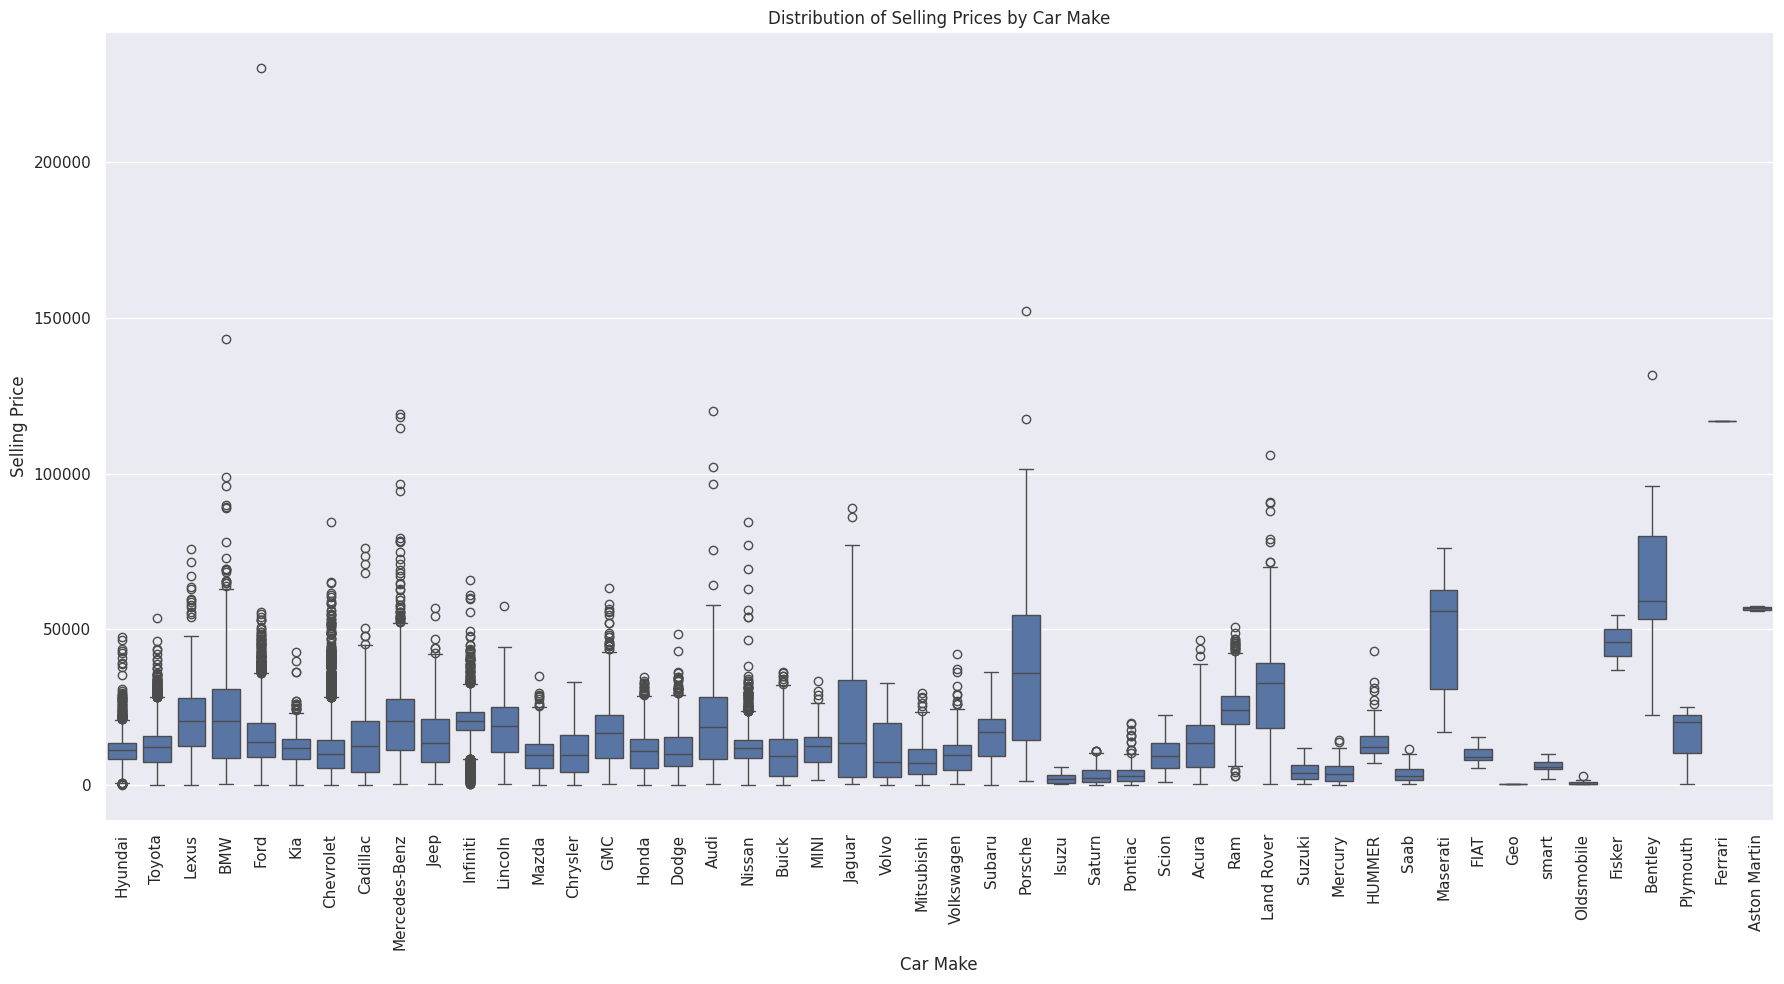

In [ ]:
#Since we have several car makes , we increased the size of the figure in order to fit
plt.figure(figsize=(18, 10))

#Here we creating a box plot for the two attributes
sns.boxplot(x='make', y='sellingprice', data=df)

# Here we simply rotaed the x and y axis labels and named them
plt.xticks(rotation=90)
plt.title('Distribution of Selling Prices by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')

plt.tight_layout()

plt.show()

In [ ]:
# # Calculate the range (max - min selling price) for each car make
# price_range_by_make = df.groupby('make')['sellingprice'].agg(['min', 'max'])
# price_range_by_make['range'] = price_range_by_make['max'] - price_range_by_make['min']

# # Sort to find the makes with the widest distribution
# widest_distribution_makes = price_range_by_make.sort_values(by='range', ascending=False).head(2)
# print("Car makes with widest distribution of selling price:")
# print(widest_distribution_makes)

In [ ]:
# median_price_by_make = df.groupby('make')['sellingprice'].median()

# # Sort to find the most expensive makes
# most_expensive_makes = median_price_by_make.sort_values(ascending=False).head(2)
# print("Most expensive car makes:")
# print(most_expensive_makes)

**Answer for Q3**: Your answer here


---From the box plot, we can conclude that the Ferari is of the most expensive since it has the highest prices then comes Bentley.


--- Regarding the widest distribution: Porsche is of the widest distribution as it has the largest space/distance between the min and the max then comes Jaguar in the second place.





**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

<Figure size 1000x600 with 0 Axes>

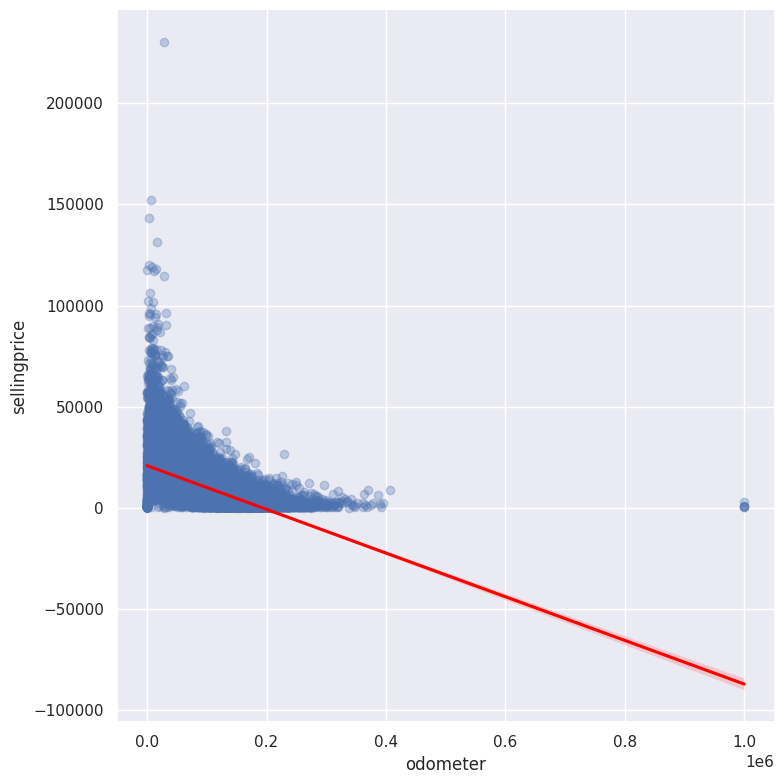

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma', height=8 , scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()


In [ ]:
#Was checking on our answer
df[['odometer', 'sellingprice']].corr()


,odometer,sellingprice
odometer,1.0000,-0.5809
sellingprice,-0.5809,1.0000


**Answer for Q4**:

Since the slope is downward so as the odometer reading increase,the selling price decrease so there is a negative coreraltion between odonmeter and selling price.So whenever the odometer reading increases, the selling price decreases and vice versa.



**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

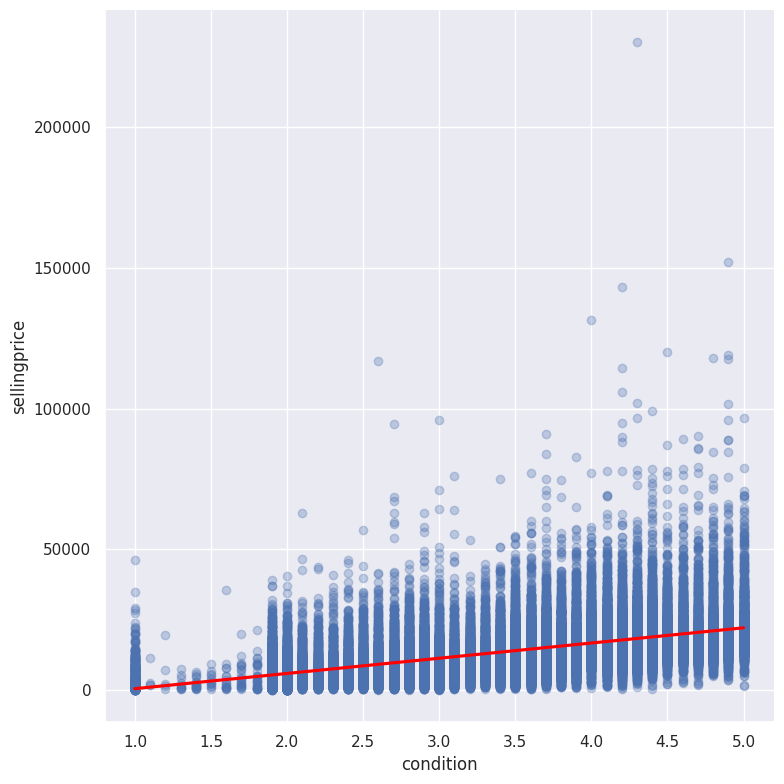

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma', height=8 , scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


In [ ]:
#checking the accuracy of our output
df[['condition', 'sellingprice']].corr()


,condition,sellingprice
condition,1.000000,0.529141
sellingprice,0.529141,1.000000


**Answer for Q5**:
Since this is an upward slop then this there is a positive corelation between the selling price and the condition. The better the car condition , the higher the selling price and vice versa

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

<ipython-input-39-2f25366aa3ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")


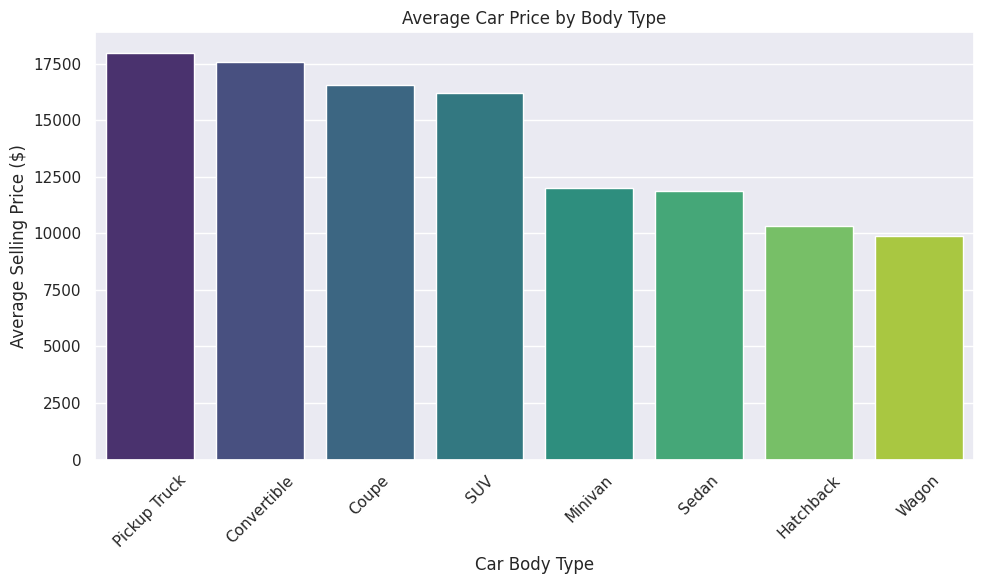

In [ ]:
#Here we grouped the data by the body column values , then we got the mean(average) of the selling price of each group and sorted them descendingly
avg_price= df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

#We placed the average prices on the -axis while the average selling price (that we have just computed) on the y-axis
sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")

plt.title('Average Car Price by Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average Selling Price ($)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Answer for Q6**:


--- Yes, there is a difference in the average car prices based on its body type


--- We have 8 main body types categories, their ranking in order from the ones having highes mean to the lowest based on body type is as the following: 1-Pickup Truck , 2- Convertible , 3- Coupe , 4- SUV , 5-Minivan , 6-Sedan , 7-Hatchback , 8- Wagon.


--- The most expensive body type is "Pickup truck" while the least expensive is "Wagon".







## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
#Getting the corelation between the numerical variables
#Undertstanding which of the other numerical values (independant variables) is positively corelated with the selling price (dependant variable)
corr = df.corr(numeric_only=True)
corr

,year,condition,odometer,sellingprice
year,1.000000,0.549158,-0.777219,0.581164
condition,0.549158,1.000000,-0.540371,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.580900
sellingprice,0.581164,0.529141,-0.580900,1.000000


In [ ]:
# categorical_columns = ['make', 'body','transmission','color','interior','state','saledate','model','seller']
# df_encode = pd.get_dummies(data=df,
#                            columns=categorical_columns,
#                            drop_first=True,
#                            dtype='int8')


In [ ]:
# #Correlation matrix
# corr = df_encode.corr(numeric_only=True)
# corr

In [ ]:
#droppping vin as it is almost like a pk as every row has its unique value as we have 45678 unique values
#moving with this column to the model may cause overfitting and also it has no relation/corelation with the dependant variable as it just defines each like name for example
df = df.drop(columns=['vin'])
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,ma,3.9,50404.0,black,gray,the hertz corporation,10900,2015-06-02 02:30:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900,2015-02-18 07:15:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122.0,silver,black,lexus financial services,24200,2015-01-20 01:30:00
3,2002,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303.0,black,black,peddle llc,3200,2015-03-04 07:10:00
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,wa,4.9,6714.0,white,gray,u-haul,22100,2015-02-18 06:45:00


In [ ]:
print(df['model'].nunique())
#we have 648 unique values for the model attribute
#Since it has several unique values, it made the model inefficient
#When we encoded the model attribute, it made the model's accuracy very bad ; the R2 became -8 so we had to drop this column
df = df.drop(columns=['model'])


648


In [ ]:
# df = df.drop(columns=['color'])
# df.head()

In [ ]:
# df = df.drop(columns=['interior'])
# df.head()

In [ ]:
#There is no relation bwetween the seller and the selling price so it should not be a factor that affects our model
#Also there are several unique values so covering them will overfit the model
#The seller does not matter here
df = df.drop(columns=['seller'])


In [ ]:
#Saledate will not affect our model in the prices prediction since the dates we are having are specific ones with day date and time
#We just need the years to train our model which is already in another attribute but the exact date and time won't affect it

df = df.drop(columns=['saledate'])
df.head()

,year,make,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,GLS,Sedan,automatic,ma,3.9,50404.0,black,gray,10900
1,2014,Toyota,SR5,SUV,automatic,fl,4.9,17846.0,gray,black,29900
2,2012,Lexus,Base,Sedan,automatic,fl,4.1,21122.0,silver,black,24200
3,2002,BMW,4.4i,SUV,automatic,fl,1.9,145303.0,black,black,3200
4,2014,Ford,E-250,Minivan,automatic,wa,4.9,6714.0,white,gray,22100


In [ ]:
#Although Trim shows the car's performance , it has over 1000 unique values.
#Enconding 'trim' may cause model overfitting.
#When we tried encoding trim , it worsened the model evaluation and the R2 became of a negative value so we had to drop it to enhance our model's performance
df = df.drop(columns=['trim'])
df.head()

,year,make,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sedan,automatic,ma,3.9,50404.0,black,gray,10900
1,2014,Toyota,SUV,automatic,fl,4.9,17846.0,gray,black,29900
2,2012,Lexus,Sedan,automatic,fl,4.1,21122.0,silver,black,24200
3,2002,BMW,SUV,automatic,fl,1.9,145303.0,black,black,3200
4,2014,Ford,Minivan,automatic,wa,4.9,6714.0,white,gray,22100


In [ ]:
#State has no effect on our model so we decided to drop it
df = df.drop(columns=['state'])
df.head()

,year,make,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,SUV,automatic,4.9,17846.0,gray,black,29900
2,2012,Lexus,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,SUV,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,Minivan,automatic,4.9,6714.0,white,gray,22100


In [ ]:
#Here we looked for the numerical corealtion between the variables and the selling price
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,condition,odometer,sellingprice
year,1.000000,0.549158,-0.777219,0.581164
condition,0.549158,1.000000,-0.540371,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.580900
sellingprice,0.581164,0.529141,-0.580900,1.000000


In [ ]:
#We used hot encoding as those columns are categorical
categorical_columns = ['make', 'body','transmission','color','interior']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values);
print('\nNumber of rows and columns in the dataset:',df_encode.shape)




Columns in original data frame:
 ['year' 'make' 'body' 'transmission' 'condition' 'odometer' 'color'
 'interior' 'sellingprice']

Number of rows and columns in the dataset: (46578, 9)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer' 'sellingprice' 'make_Aston Martin'
 'make_Audi' 'make_BMW' 'make_Bentley' 'make_Buick' 'make_Cadillac'
 'make_Chevrolet' 'make_Chrysler' 'make_Dodge' 'make_FIAT' 'make_Ferrari'
 'make_Fisker' 'make_Ford' 'make_GMC' 'make_Geo' 'make_HUMMER'
 'make_Honda' 'make_Hyundai' 'make_Infiniti' 'make_Isuzu' 'make_Jaguar'
 'make_Jeep' 'make_Kia' 'make_Land Rover' 'make_Lexus' 'make_Lincoln'
 'make_MINI' 'make_Maserati' 'make_Mazda' 'make_Mercedes-Benz'
 'make_Mercury' 'make_Mitsubishi' 'make_Nissan' 'make_Oldsmobile'
 'make_Plymouth' 'make_Pontiac' 'make_Porsche' 'make_Ram' 'make_Saab'
 'make_Saturn' 'make_Scion' 'make_Subaru' 'make_Suzuki' 'make_Toyota'
 'make_Volkswagen' 'make_Volvo' 'make_smart' 'body_Coupe' 'body_Hatchback'
 'bo

In [ ]:
df_encode.head()

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,2013,3.9,50404.0,10900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#We normalized the numerical columns in order to have a range
numerical_columns = ['year', 'odometer', 'condition']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,0.92,0.725,0.050403,10900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.96,0.975,0.017845,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.88,0.775,0.021121,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.48,0.225,0.145302,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.96,0.975,0.006713,22100,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Correlation matrix
corr = df_encode.corr(numeric_only=True)
corr

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
year,1.000000,0.549158,-0.777219,0.581164,-0.005479,-0.018805,-0.041495,-0.010103,-0.049946,-0.075277,...,-0.160923,-0.009149,0.015512,-0.004098,-0.002239,0.004075,-0.014698,-0.110756,-0.005468,0.002173
condition,0.549158,1.000000,-0.540371,0.529141,0.001567,0.003547,0.031729,0.001399,-0.017882,-0.023222,...,-0.125516,-0.007104,0.008770,-0.002171,0.003129,0.017400,-0.009550,-0.036380,0.004445,0.003808
odometer,-0.777219,-0.540371,1.000000,-0.580900,-0.007428,-0.005750,-0.009054,-0.006542,0.028816,0.045084,...,0.162019,0.003986,-0.020097,-0.003376,-0.002157,-0.018870,0.014874,0.086982,-0.003939,-0.005811
sellingprice,0.581164,0.529141,-0.580900,1.000000,0.029308,0.069786,0.157110,0.073631,-0.036035,0.008509,...,-0.184063,-0.008819,0.051165,0.012552,0.001447,0.053864,-0.011661,-0.042188,0.003376,0.019641
make_Aston Martin,-0.005479,0.001567,-0.007428,0.029308,1.000000,-0.000672,-0.001268,-0.000086,-0.000659,-0.000752,...,-0.004521,-0.000121,-0.000190,-0.000101,-0.000169,-0.000292,-0.000285,-0.001947,-0.000146,-0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
interior_red,0.004075,0.017400,-0.018870,0.053864,-0.000292,0.000200,0.053634,-0.000583,0.000377,-0.000840,...,-0.030691,-0.000825,-0.001288,-0.000684,-0.001148,1.000000,-0.001936,-0.013215,-0.000989,-0.000206
interior_silver,-0.014698,-0.009550,0.014874,-0.011661,-0.000285,0.005278,0.007493,-0.000570,0.000584,-0.004995,...,-0.030015,-0.000807,-0.001259,-0.000669,-0.001123,-0.001936,1.000000,-0.012924,-0.000967,-0.000202
interior_tan,-0.110756,-0.036380,0.086982,-0.042188,-0.001947,-0.005678,0.020993,0.014112,0.046680,0.031829,...,-0.204940,-0.005507,-0.008599,-0.004566,-0.007666,-0.013215,-0.012924,1.000000,-0.006603,-0.001376
interior_white,-0.005468,0.004445,-0.003939,0.003376,-0.000146,0.007240,0.006066,-0.000291,-0.002237,-0.002552,...,-0.015334,-0.000412,-0.000643,-0.000342,-0.000574,-0.000989,-0.000967,-0.006603,1.000000,-0.000103


## Modelling

_Apply the linear regression model below._

In [ ]:
#Here we decided spliitted the data to training and testing

from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
#Here we are fitting the linear regression model to the data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2116.522635
1,theta_1,year,23551.633030
2,theta_2,condition,6758.920731
3,theta_3,odometer,-42539.974325
4,theta_4,make_Aston Martin,36829.664512
...,...,...,...
87,theta_87,interior_red,5661.377695
88,theta_88,interior_silver,-1018.865466
89,theta_89,interior_tan,-85.588106
90,theta_90,interior_white,-2872.320884


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [61]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.675383312059073
The median absolute error (MAE) is:  2643.8147322899504


In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Here we started the model evaluation
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred, y_test)

#Measuring R2 to assess how good is our model
R_square = lin_reg.score(x_test,y_test)

print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  5403.4953665404755
R^2 obtained is: 0.6839707373921174


In [ ]:

lin_reg.score(x_test, y_test)


0.6839707373921174

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:

---The model's accuracy is 68% meaning that the model is able to correctly predict the selling price by 68%.

---However, some improvement are required since 68% is still not a good percenatge. 75% to 80% can be considered as a great model.


---Those improvemnets could be cosnidering other attributes that has higher corelation with our dependant variable which is the selling price in our case.Moreover, eliminating outlier should improve the model's accuracy too as it could be one of the problems that caused this.



---So as future reccomendations, we reccommend eliminating outliers and
considering other variables that may correlate to the selling price


---








